In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [3]:
df=pd.read_excel("Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data Preparation,Exploratory Data Analysis And Feature Engineering

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df_prep=df.drop(["Description","InvoiceNo","InvoiceDate"],axis=1)
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,85123A,6,2.55,17850.0,United Kingdom
1,71053,6,3.39,17850.0,United Kingdom
2,84406B,8,2.75,17850.0,United Kingdom
3,84029G,6,3.39,17850.0,United Kingdom
4,84029E,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...
541904,22613,12,0.85,12680.0,France
541905,22899,6,2.10,12680.0,France
541906,23254,4,4.15,12680.0,France
541907,23255,4,4.15,12680.0,France


In [6]:
mode=df_prep["CustomerID"].mode()[0]
df_prep["CustomerID"]=df_prep["CustomerID"].fillna(mode)
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,85123A,6,2.55,17850.0,United Kingdom
1,71053,6,3.39,17850.0,United Kingdom
2,84406B,8,2.75,17850.0,United Kingdom
3,84029G,6,3.39,17850.0,United Kingdom
4,84029E,6,3.39,17850.0,United Kingdom
...,...,...,...,...,...
541904,22613,12,0.85,12680.0,France
541905,22899,6,2.10,12680.0,France
541906,23254,4,4.15,12680.0,France
541907,23255,4,4.15,12680.0,France


## Label Encoding

In [7]:
mapping={invoice:idx for idx,invoice in enumerate(df_prep["StockCode"].unique())}
mapping2={invoice:idx for idx,invoice in enumerate(df_prep["Country"].unique())}
df_prep["StockCode"]=df_prep["StockCode"].map(mapping)
df_prep["Country"]=df_prep["Country"].map(mapping2)

In [8]:
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,0,6,2.55,17850.0,0
1,1,6,3.39,17850.0,0
2,2,8,2.75,17850.0,0
3,3,6,3.39,17850.0,0
4,4,6,3.39,17850.0,0
...,...,...,...,...,...
541904,2051,12,0.85,12680.0,1
541905,415,6,2.10,12680.0,1
541906,3299,4,4.15,12680.0,1
541907,3315,4,4.15,12680.0,1


In [9]:
df_prep.isna().sum()

StockCode     0
Quantity      0
UnitPrice     0
CustomerID    0
Country       0
dtype: int64

In [10]:
mapping3={invoice:idx for idx,invoice in enumerate(df_prep["CustomerID"].unique())}
df_prep["CustomerID"]=df_prep["CustomerID"].map(mapping3)

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_prep[df_prep.drop("Country",axis=1).columns]=scale.fit_transform(df_prep.drop("Country",axis=1))
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,-1.102715,-0.016289,-0.021301,-0.914970,0
1,-1.101910,-0.016289,-0.012620,-0.914970,0
2,-1.101105,-0.007118,-0.019234,-0.914970,0
3,-1.100299,-0.016289,-0.012620,-0.914970,0
4,-1.099494,-0.016289,-0.012620,-0.914970,0
...,...,...,...,...,...
541904,0.548991,0.011224,-0.038871,1.736254,1
541905,-0.768509,-0.016289,-0.025952,1.736254,1
541906,1.554028,-0.025460,-0.004766,1.736254,1
541907,1.566913,-0.025460,-0.004766,1.736254,1


In [ ]:
import seaborn as sns
sns.pairplot(df_prep)

## MODEL SELECTION AND TRAINING

In [12]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [13]:
sse=[]
for i in range(1,20):
    model=KMeans(n_clusters=i,random_state=42,n_init="auto")
    model.fit(df_prep)
    sse.append(model.inertia_)

sse

[6567995.416130785,
 6091557.25652704,
 3048507.481345926,
 2213288.5865140324,
 1921251.053438579,
 1667924.6271642193,
 1459660.1023004435,
 1153733.9015066342,
 1036691.8047367956,
 783537.9720089501,
 679551.3190453066,
 650064.4682784058,
 539763.3995308283,
 510060.4386415703,
 451603.7686787725,
 407412.1206131577,
 367751.1514004524,
 337738.5054753446,
 328641.32164312707]

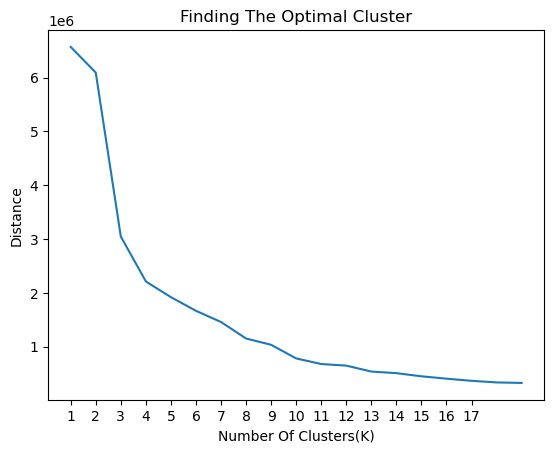

In [14]:
plt.plot(range(1,20),sse)
plt.xlabel("Number Of Clusters(K)")
plt.ylabel("Distance")
plt.xticks(range(1,18))
plt.title("Finding The Optimal Cluster")
plt.show()

In [234]:
model_kms=KMeans(n_clusters=7,n_init="auto",random_state=42)
model_kms.fit(df_prep.drop("ClusterKM",axis=1))
labels=model_kms.labels_

In [235]:
df["ClusterKM"]=labels
df_prep["ClusterKM"]=labels

In [236]:
silhouette_score(df_prep.drop("ClusterKM",axis=1), df_prep["ClusterKM"])

0.45967032860868784

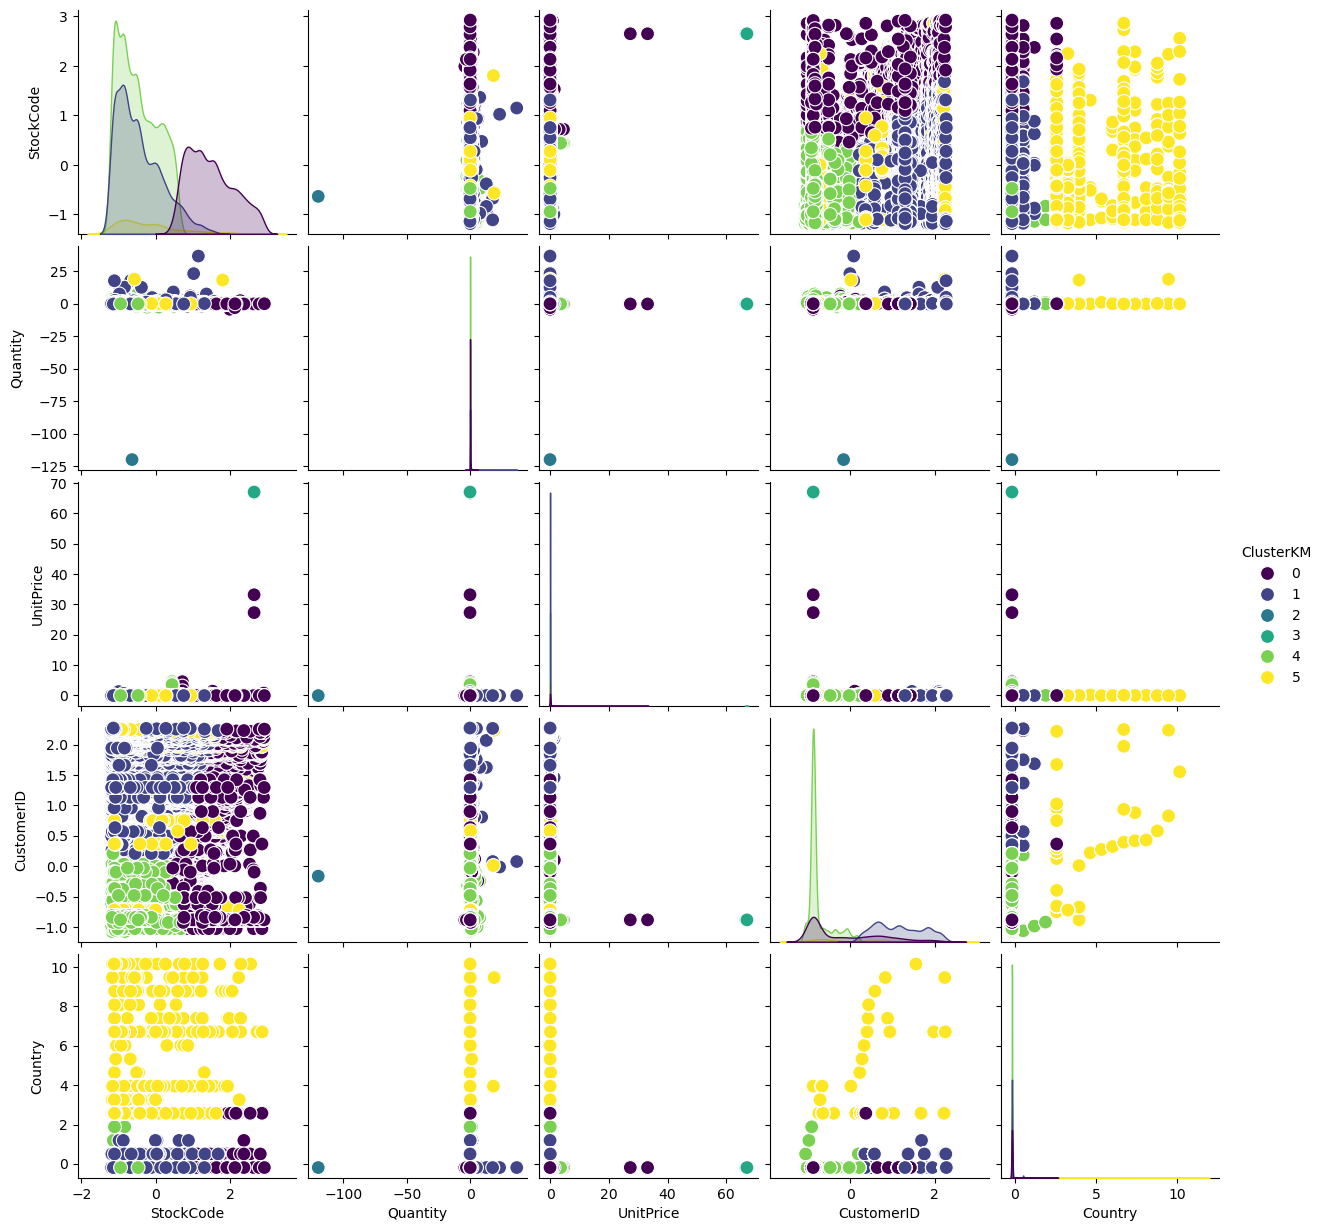

In [18]:
sns.pairplot(df_prep,hue="ClusterKM",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

In [99]:
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country,ClusterKM
0,-1.186113,-0.022593,-0.025236,-1.075845,-0.186406,0
1,-1.184405,-0.022593,-0.021076,-1.075845,-0.186406,0
2,-1.182696,0.002995,-0.024246,-1.075845,-0.186406,0
3,-1.180988,-0.022593,-0.021076,-1.075845,-0.186406,0
4,-1.179279,-0.022593,-0.021076,-1.075845,-0.186406,0
...,...,...,...,...,...,...
19995,0.754824,-0.150537,-0.019293,2.274034,-0.186406,2
19996,2.131932,-2.952491,-0.037866,-0.883737,-0.186406,2
19997,-0.473639,-0.035388,0.004234,-0.883737,-0.186406,0
19998,-0.945205,0.054172,-0.013349,-0.883737,-0.186406,0


## Applying Aggloromorative Clustering

In [244]:
model_hrc=AgglomerativeClustering(n_clusters=6,linkage="complete")
model_hrc.fit(df_prep.drop("ClusterKM",axis=1))
label2=model_hrc.labels_

In [245]:
df["ClusterHC"]=label2

In [247]:
df_prep2=df_prep.drop("ClusterKM",axis=1)
df_prep2["ClusterHC"]=label2

In [248]:
silhouette_score(df_prep2.drop("ClusterHC",axis=1), df_prep2["ClusterHC"])

0.8965288733011847

In [102]:
df_prep2

,StockCode,Quantity,UnitPrice,CustomerID,Country,ClusterHC
0,-1.186113,-0.022593,-0.025236,-1.075845,-0.186406,5
1,-1.184405,-0.022593,-0.021076,-1.075845,-0.186406,5
2,-1.182696,0.002995,-0.024246,-1.075845,-0.186406,5
3,-1.180988,-0.022593,-0.021076,-1.075845,-0.186406,5
4,-1.179279,-0.022593,-0.021076,-1.075845,-0.186406,5
...,...,...,...,...,...,...
19995,0.754824,-0.150537,-0.019293,2.274034,-0.186406,0
19996,2.131932,-2.952491,-0.037866,-0.883737,-0.186406,0
19997,-0.473639,-0.035388,0.004234,-0.883737,-0.186406,5
19998,-0.945205,0.054172,-0.013349,-0.883737,-0.186406,5


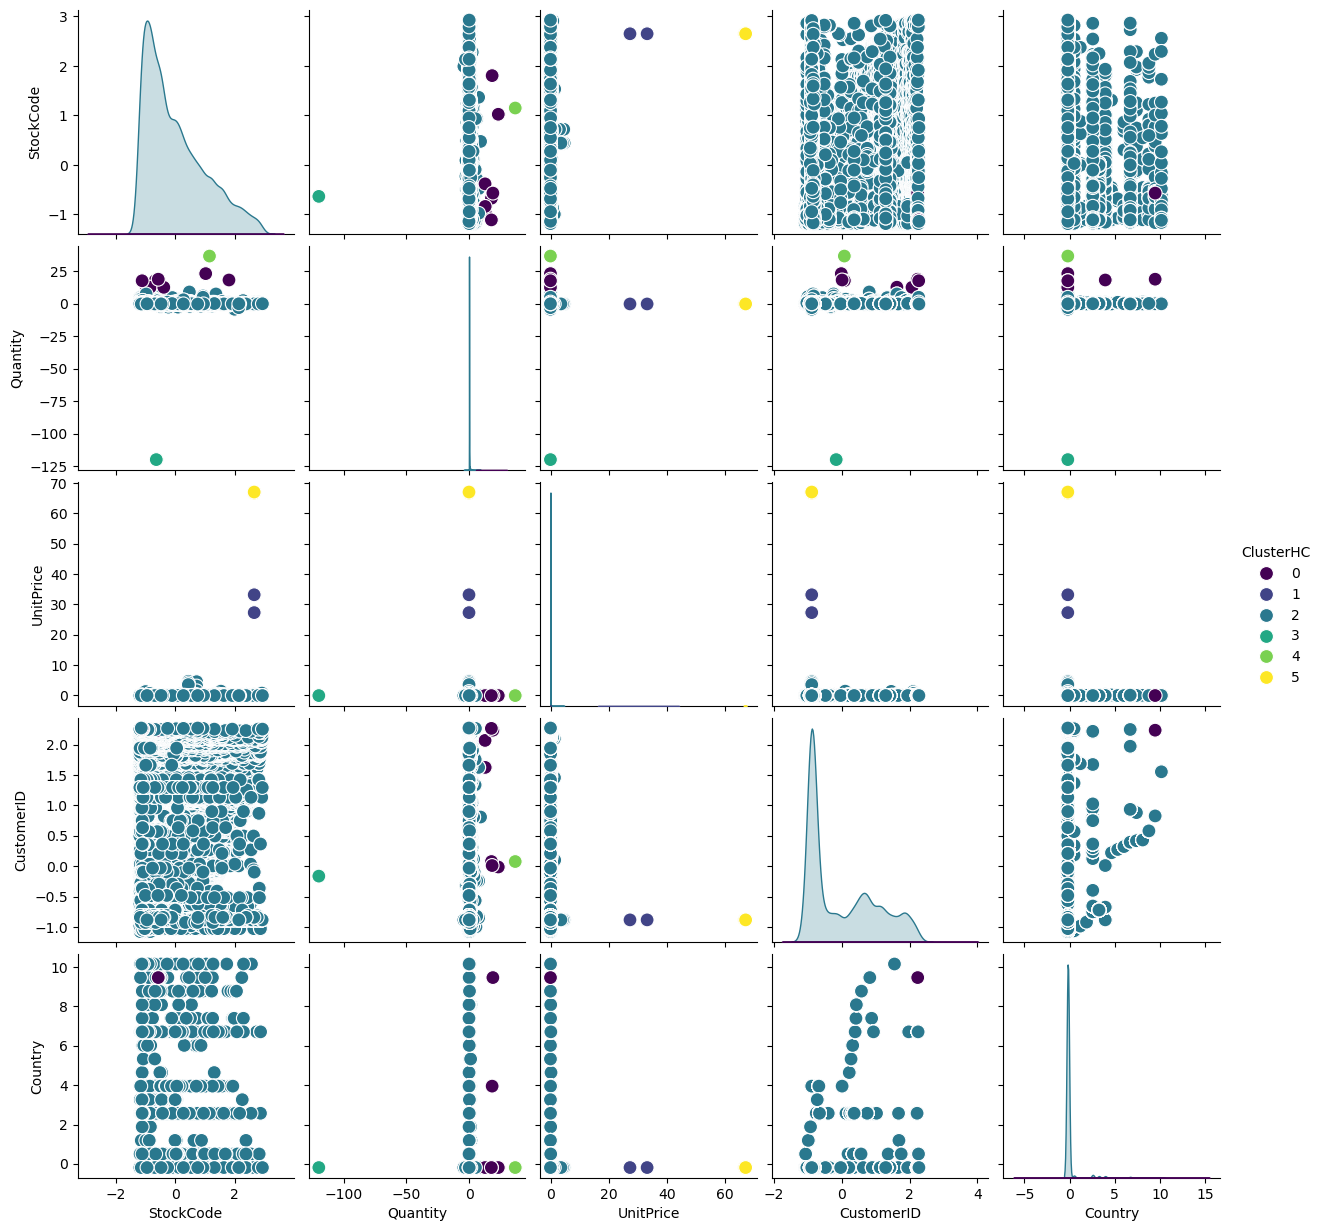

In [243]:
sns.pairplot(df_prep2,hue="ClusterHC",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

In [93]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ClusterKM,ClusterHC
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,5
...,...,...,...,...,...,...,...,...,...,...
19995,C537998,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-4,2010-12-09 11:42:00,3.75,17411.0,United Kingdom,1,0
19996,537999,22034,NaN,-223,2010-12-09 11:44:00,0.00,NaN,United Kingdom,2,0
19997,538000,22942,CHRISTMAS LIGHTS 10 SANTAS,5,2010-12-09 11:44:00,8.50,12748.0,United Kingdom,0,5
19998,538000,79321,CHILLI LIGHTS,12,2010-12-09 11:44:00,4.95,12748.0,United Kingdom,0,5


## APPLYING DBSCAN

In [178]:
from sklearn.cluster import DBSCAN
model_db=DBSCAN(eps=0.5,min_samples=100)
model_db.fit(df_prep.drop("ClusterKM",axis=1))
labels3=model_db.labels_
labels3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [179]:
df_prep3=df_prep.drop("ClusterKM",axis=1)
df_prep3["ClusterDB"]=labels3

In [180]:
silhouette_score(df_prep3.drop("ClusterDB",axis=1), df_prep3["ClusterDB"])


0.5709916008409992

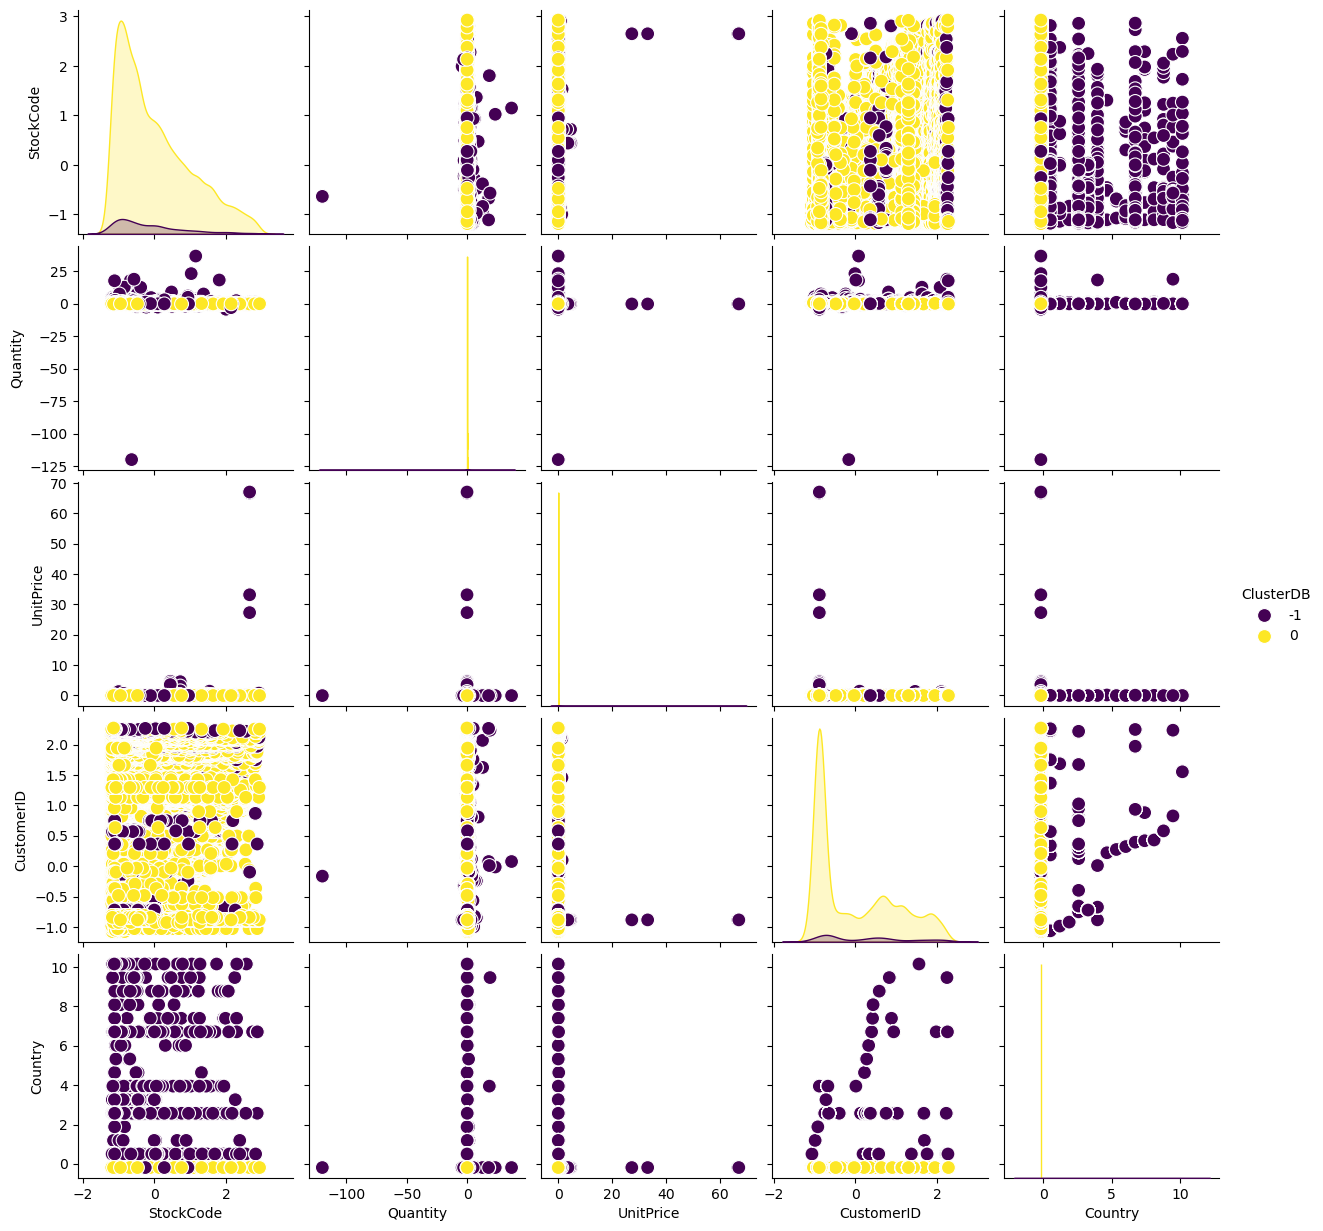

In [181]:
sns.pairplot(df_prep3,hue="ClusterDB",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

## ADDING THE PREDICTION MODEL(PREDICTING THE CATEGORY ONE FALLS IN PRIOR TO BEHAVIOUR)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [103]:
X=df_prep.drop("ClusterKM",axis=1)
y=df_prep.ClusterKM
X

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,-1.186113,-0.022593,-0.025236,-1.075845,-0.186406
1,-1.184405,-0.022593,-0.021076,-1.075845,-0.186406
2,-1.182696,0.002995,-0.024246,-1.075845,-0.186406
3,-1.180988,-0.022593,-0.021076,-1.075845,-0.186406
4,-1.179279,-0.022593,-0.021076,-1.075845,-0.186406
...,...,...,...,...,...
19995,0.754824,-0.150537,-0.019293,2.274034,-0.186406
19996,2.131932,-2.952491,-0.037866,-0.883737,-0.186406
19997,-0.473639,-0.035388,0.004234,-0.883737,-0.186406
19998,-0.945205,0.054172,-0.013349,-0.883737,-0.186406


## FINE TUNING AND MODEL SELECTION

In [69]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

mdls = [
    ("RandomForest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LogisticRegression", LogisticRegression())
]
scores=[]
CV=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for name,model in mdls:
    score=cross_val_score(estimator=model,X=X,y=y,cv=CV)
    scores.append({"Model":name,"Score":np.mean(score)})
scores

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 68

[{'Model': 'RandomForest', 'Score': 0.9964999999999999},
 {'Model': 'XGBoost', 'Score': nan},
 {'Model': 'LogisticRegression', 'Score': 0.99795}]

In [95]:
y.value_counts()

ClusterKM
0    8588
4    5672
2    3000
1    2735
3       4
5       1
Name: count, dtype: int64

## HANDLING CLASS IMBALANCE

In [122]:
from sklearn.metrics import silhouette_score

silhouette_score(df_prep3.drop("ClusterDB",axis=1), df_prep3["ClusterDB"])


-0.24539604587012945

In [123]:
df_prep3["ClusterDB"].value_counts()

ClusterDB
 0     18820
-1       402
 4       146
 5       138
 6       113
 7        99
 3        95
 12       51
 9        29
 1        20
 8        20
 11       17
 14       16
 2        14
 10       11
 13        9
Name: count, dtype: int64

In [183]:
df_prep=df_prep.drop("ClusterDB",axis=1)

In [238]:
df_prep["ClusterKM"].value_counts()

ClusterKM
4    7672
1    5463
0    3876
6    2245
5     739
3       4
2       1
Name: count, dtype: int64